In [51]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_excel('clients.xlsx')
#
df = pd.DataFrame(data)
pd.set_option('display.width',400)
#S
pd.set_option('display.max_columns', 21)
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

print(df.head())
df.drop('CustomerID',axis='columns',inplace=True)

print(df.head())
print(df.shape)

for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)

data = df[df.select_dtypes(exclude=np.number).columns]
print(data)


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount
0       50001      1       4         Mobile Phone         3                6           Debit Card  Female               3                         3  Laptop & Accessory                  2        Single                9         1                           11           1           1                  5          159.93
1       50002      1       4         Mobile Phone         1                8                  UPI    Male               3                         4        Mobile Phone                  3        Single                7         1                           15           0           1                  0          120.90
2       50003      1       4         Mobile Phone   

In [52]:
SelectFutures = df.drop(['HourSpendOnApp','CouponUsed','OrderAmountHikeFromlastYear'],axis=1)


In [53]:
from sklearn.preprocessing import OneHotEncoder
X_num = df.select_dtypes(exclude='object')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(data)
categorical_columns = [f'{col}_{cat}' for i, col in enumerate(data.columns) for cat in encoder.categories_[i]]

one_hot_features = pd.DataFrame(X_encoded, columns=categorical_columns)
df = X_num.join(one_hot_features)

encoder = OneHotEncoder()

df.head()



U:\Univer\Anul 3\Big Data\Lab1\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4,3,6,3,3,2,9,1,11,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,4,1,8,3,4,3,7,1,15,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,4,1,30,2,4,3,6,1,14,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,0,3,15,2,4,5,8,0,23,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0,1,12,4,3,5,3,0,11,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:

X = df.drop('Churn' , axis = 'columns')
y = df['Churn']
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , y)
print(x_over.shape, y_over.shape)




(9360, 30) (9360,)


In [90]:
for i in x_over.columns:
        print(x_over[i].value_counts())
        print('*' * 40)

Tenure
1     2072
0     1839
8      328
9      315
7      307
4      284
3      278
10     273
2      271
13     260
6      259
5      256
14     234
12     231
11     230
15     222
19     195
16     190
18     178
20     164
17     159
21     102
23      98
22      84
24      78
30      76
27      72
28      70
26      63
25      62
29      57
31      49
50       1
60       1
51       1
61       1
Name: count, dtype: int64
****************************************
CityTier
1    5868
3    2605
2     887
Name: count, dtype: int64
****************************************
WarehouseToHome
9      895
8      754
7      658
14     556
16     538
15     515
6      494
10     453
13     393
11     391
12     389
17     329
30     246
31     222
29     184
22     181
24     176
23     174
28     174
18     165
19     163
26     156
20     152
21     151
32     148
25     138
33     135
27     134
35     131
34      91
36      57
5       13
126      3
127      1
Name: count, dtype: int64
********

In [222]:
x_over.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4,3,6,3,3,2,9,1,11,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,4,1,8,3,4,3,7,1,15,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,4,1,30,2,4,3,6,1,14,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,3,15,2,4,5,8,0,23,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,1,12,4,3,5,3,0,11,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [17]:
X = df.drop('Churn' , axis = 'columns')
y = df['Churn']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((3938, 30), (1689, 30))

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((6552, 30), (2808, 30))

In [56]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler, MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,6552.0,0.121605,0.133623,0.0,0.016393,0.065574,0.213115,1.0
CityTier,6552.0,0.320742,0.441202,0.0,0.000000,0.000000,1.000000,1.0
WarehouseToHome,6552.0,0.090727,0.072093,0.0,0.032787,0.073770,0.139344,1.0
HourSpendOnApp,6552.0,0.567125,0.144464,0.0,0.400000,0.600000,0.600000,1.0
NumberOfDeviceRegistered,6552.0,0.540385,0.194519,0.0,0.400000,0.600000,0.600000,1.0
SatisfactionScore,6552.0,0.516102,0.333685,0.0,0.250000,0.500000,0.750000,1.0
NumberOfAddress,6552.0,0.151317,0.121137,0.0,0.047619,0.095238,0.238095,1.0
Complain,6552.0,0.302961,0.459574,0.0,0.000000,0.000000,1.000000,1.0
OrderAmountHikeFromlastYear,6552.0,0.299705,0.241402,0.0,0.133333,0.200000,0.466667,1.0
CouponUsed,6552.0,0.114534,0.128773,0.0,0.071429,0.071429,0.142857,1.0


In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred_prob = rfc.predict_proba(X_test)[:,1]
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.9811


In [58]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Tenure                                   0.207216
MaritalStatus_Married                    0.079682
MaritalStatus_Single                     0.073378
CashbackAmount                           0.067245
DaySinceLastOrder                        0.045826
WarehouseToHome                          0.041767
PreferedOrderCat_Mobile Phone            0.037281
OrderAmountHikeFromlastYear              0.035252
NumberOfAddress                          0.034063
PreferredPaymentMode_Credit Card         0.031911
PreferredPaymentMode_Debit Card          0.029216
PreferedOrderCat_Laptop & Accessory      0.029207
MaritalStatus_Divorced                   0.028619
SatisfactionScore                        0.028389
Complain                                 0.026606
NumberOfDeviceRegistered                 0.020210
Gender_Female                            0.018900
Gender_Male                              0.018871
PreferredPaymentMode_E wallet            0.018728
PreferredLoginDevice_Mobile Phone        0.018528


In [59]:
from sklearn.metrics import confusion_matrix

cmRF = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cmRF)

Confusion matrix

 [[1390   19]
 [  34 1365]]


<Axes: >

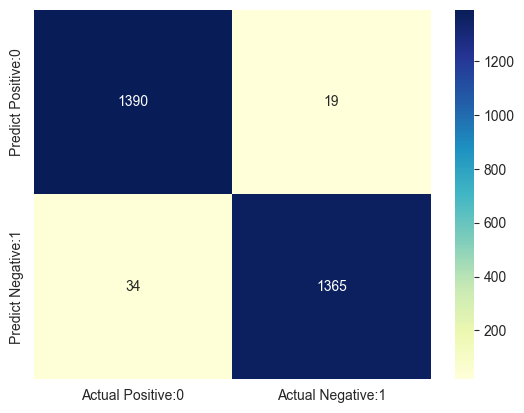

In [60]:
cm_matrix = pd.DataFrame(data=cmRF, columns=['Actual Positive:0', 'Actual Negative:1'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1409
           1       0.99      0.98      0.98      1399

    accuracy                           0.98      2808
   macro avg       0.98      0.98      0.98      2808
weighted avg       0.98      0.98      0.98      2808


In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

precisionRF = precision_score(y_test, y_pred)
recallRF = recall_score(y_test, y_pred)
f1RF = f1_score(y_test, y_pred)


In [63]:
y_test.shape


(2808,)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

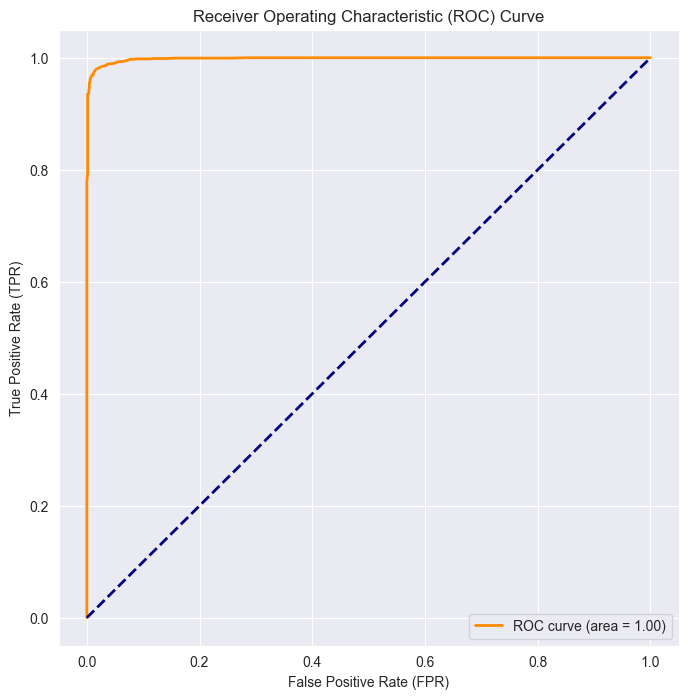

In [64]:
from sklearn.metrics import roc_curve, auc

fprRF, tprRF, thresholds = roc_curve(y_test, y_pred_prob)
roc_aucRF = auc(fprRF, tprRF)


# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fprRF, tprRF, color='darkorange', lw=2, label=f'ROC curve (area = {roc_aucRF:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty=None, random_state=0).fit(X_train,y_train)
log_prediction = logistic.predict(X_test)
log_pred_prob=logistic.predict_proba(X_test)[:,1]


In [66]:
cmLog = confusion_matrix(y_test, log_prediction)

print('Confusion matrix\n\n', cmLog)

Confusion matrix

 [[1072  337]
 [ 266 1133]]


In [67]:
precisionLog = precision_score(y_test, log_prediction)
recallLog = recall_score(y_test, log_prediction)
f1Log = f1_score(y_test, log_prediction)

In [68]:
print(classification_report(y_test,log_prediction))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1409
           1       0.77      0.81      0.79      1399

    accuracy                           0.79      2808
   macro avg       0.79      0.79      0.79      2808
weighted avg       0.79      0.79      0.79      2808


<Axes: >

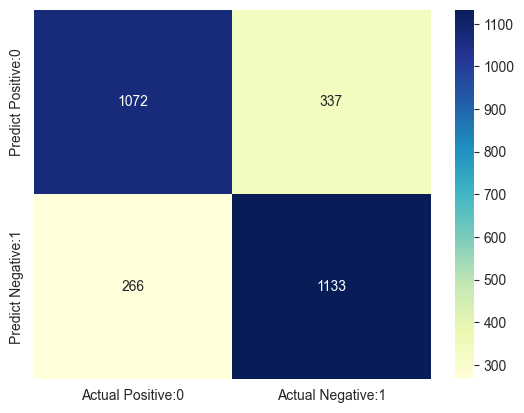

In [69]:
cm_matrix = pd.DataFrame(data=cmLog, columns=['Actual Positive:0', 'Actual Negative:1'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

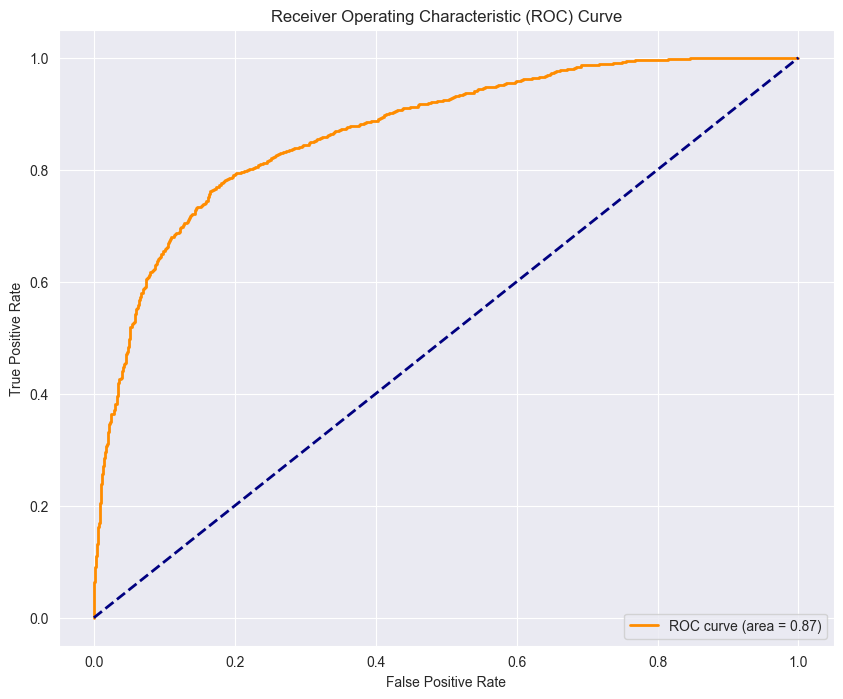

In [70]:
fprLog, tprLog, thresholds = roc_curve(y_test, log_pred_prob)
roc_aucLog = auc(fprLog, tprLog)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fprLog, tprLog, color='darkorange', lw=2, label=f'ROC curve (area = {roc_aucLog:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [34]:
X_test.shape

(1689, 30)

In [71]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

model.evaluate(X_test,y_test)

yp_prob=model.predict(X_test)

y_predict = []
for elem in yp_prob:
    if elem >0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)
print(y_predict[:10])


Epoch 1/100
205/205 [==============================] - 1s 855us/step - loss: 0.6261 - accuracy: 0.6543
Epoch 2/100
205/205 [==============================] - 0s 959us/step - loss: 0.5194 - accuracy: 0.7424
Epoch 3/100
205/205 [==============================] - 0s 828us/step - loss: 0.4491 - accuracy: 0.7944
Epoch 4/100
205/205 [==============================] - 0s 822us/step - loss: 0.3891 - accuracy: 0.8263
Epoch 5/100
205/205 [==============================] - 0s 807us/step - loss: 0.3534 - accuracy: 0.8436
Epoch 6/100
205/205 [==============================] - 0s 847us/step - loss: 0.3285 - accuracy: 0.8549
Epoch 7/100
205/205 [==============================] - 0s 790us/step - loss: 0.3040 - accuracy: 0.8697
Epoch 8/100
205/205 [==============================] - 0s 835us/step - loss: 0.2879 - accuracy: 0.8776
Epoch 9/100
205/205 [==============================] - 0s 819us/step - loss: 0.2705 - accuracy: 0.8851
Epoch 10/100
205/205 [==============================] - 0s 796us/step - l

In [72]:
cmRN = confusion_matrix(y_test, y_predict)

print('Confusion matrix\n\n', cmRN)

Confusion matrix

 [[1367   42]
 [  71 1328]]


In [73]:
precisionRN = precision_score(y_test, y_predict)
recallRN = recall_score(y_test, y_predict)
f1RN = f1_score(y_test, y_predict)


In [74]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1409
           1       0.97      0.95      0.96      1399

    accuracy                           0.96      2808
   macro avg       0.96      0.96      0.96      2808
weighted avg       0.96      0.96      0.96      2808


<Axes: >

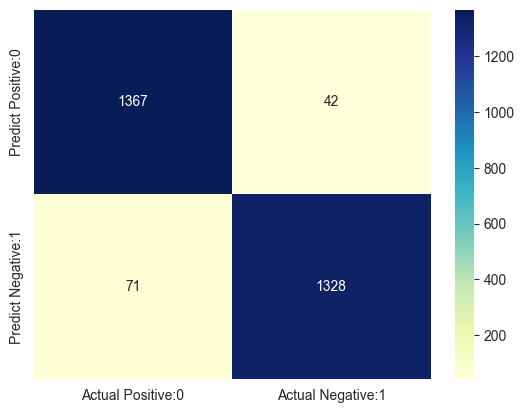

In [75]:
cm_matrix = pd.DataFrame(data=cmRN, columns=['Actual Positive:0', 'Actual Negative:1'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

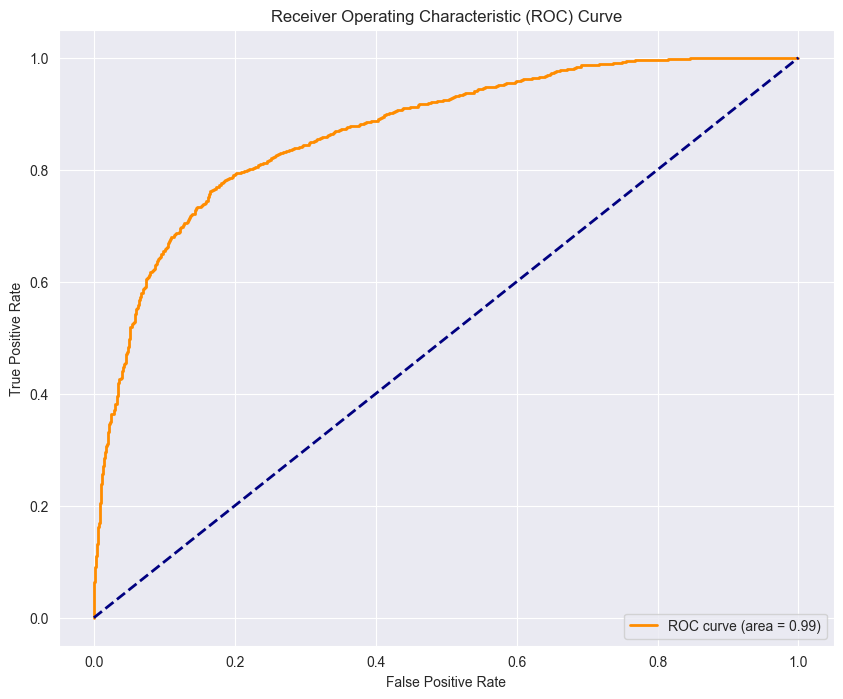

In [76]:
fprRN, tprRN, thresholds = roc_curve(y_test, yp_prob)
roc_aucRN = auc(fprRN, tprRN)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fprLog, tprLog, color='darkorange', lw=2, label=f'ROC curve (area = {roc_aucRN:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [77]:
from sklearn.svm import SVC

model=SVC(probability=True)
model.fit(X_train,y_train)
y_SVC_prob=model.predict_proba(X_test)[:,1]
y_predSVC = model.predict(X_test)
y_predSVC

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
cmSVM = confusion_matrix(y_test, y_predSVC)

print('Confusion matrix\n\n', cmSVM)

Confusion matrix

 [[1276  133]
 [ 115 1284]]


In [79]:
precisionSVM = precision_score(y_test, y_predSVC)
recallSVM = recall_score(y_test, y_predSVC)
f1SVM = f1_score(y_test, y_predSVC)

<Axes: >

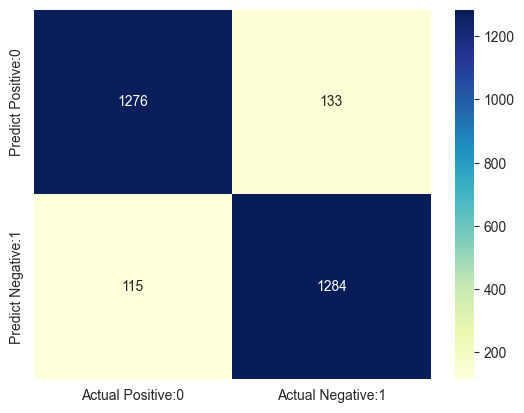

In [80]:
cm_matrix = pd.DataFrame(data=cmSVM, columns=['Actual Positive:0', 'Actual Negative:1'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [81]:
print(classification_report(y_test,y_predSVC))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1409
           1       0.91      0.92      0.91      1399

    accuracy                           0.91      2808
   macro avg       0.91      0.91      0.91      2808
weighted avg       0.91      0.91      0.91      2808


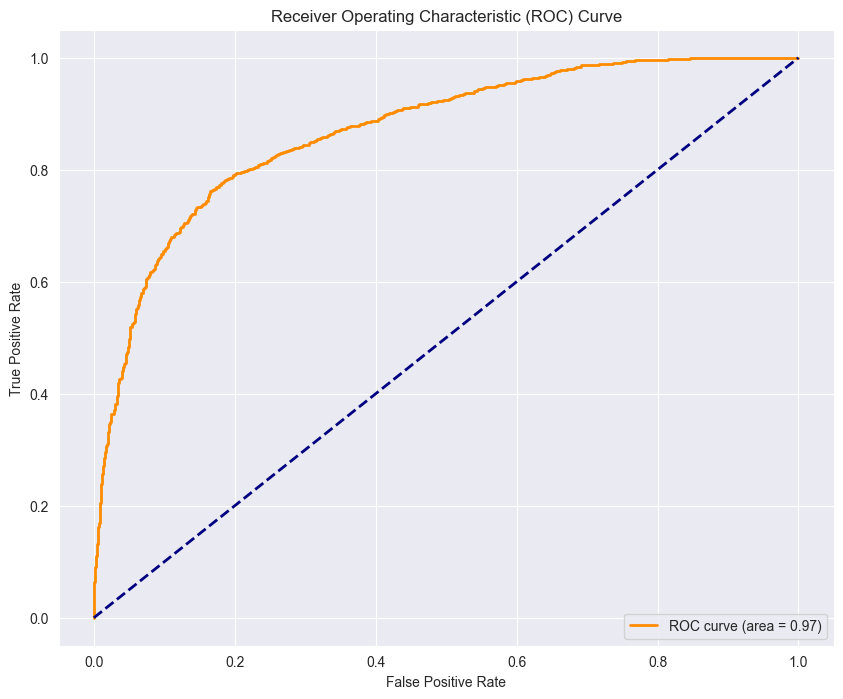

In [82]:
fprSvm, tprSvm, thresholds = roc_curve(y_test, y_SVC_prob)
roc_aucSvm = auc(fprSvm, tprSvm)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fprLog, tprLog, color='darkorange', lw=2, label=f'ROC curve (area = {roc_aucSvm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

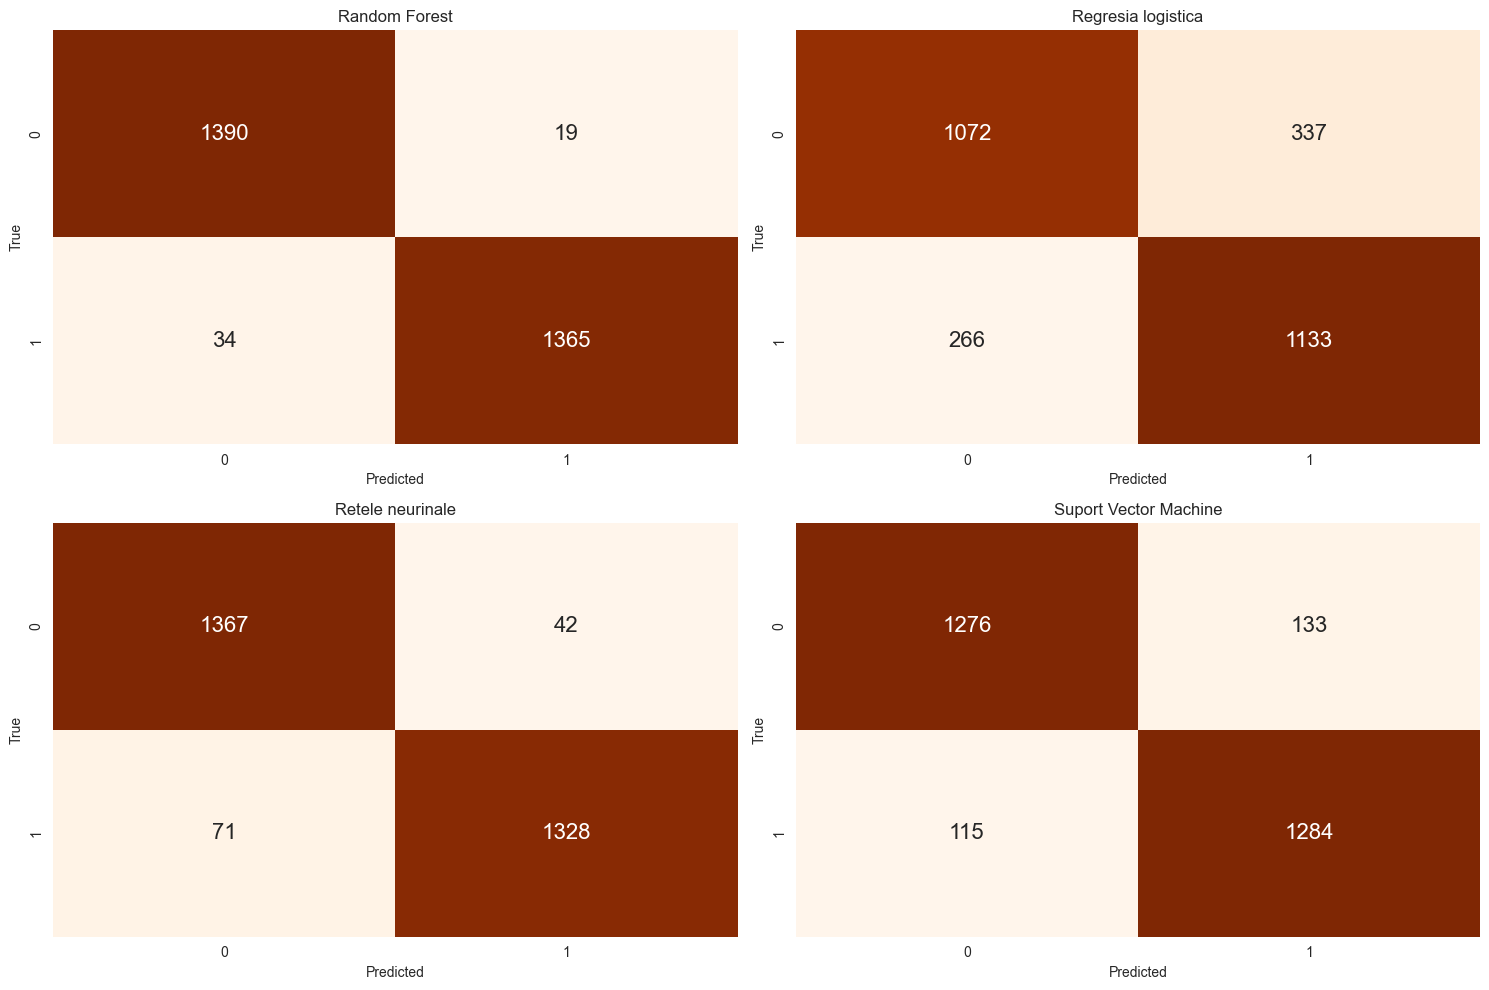

In [83]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(cmRF, annot=True, fmt="d", cmap="Oranges", cbar=False,annot_kws={"size": 16})
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2, 2, 2)
sns.heatmap(cmLog, annot=True, fmt="d", cmap="Oranges", cbar=False,annot_kws={"size": 16})
plt.title('Regresia logistica')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(2, 2, 3)
sns.heatmap(cmRN, annot=True, fmt="d", cmap="Oranges", cbar=False,annot_kws={"size": 16})
plt.title('Retele neurinale')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(2, 2, 4)
sns.heatmap(cmSVM, annot=True, fmt="d", cmap="Oranges", cbar=False,annot_kws={"size": 16})
plt.title('Suport Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

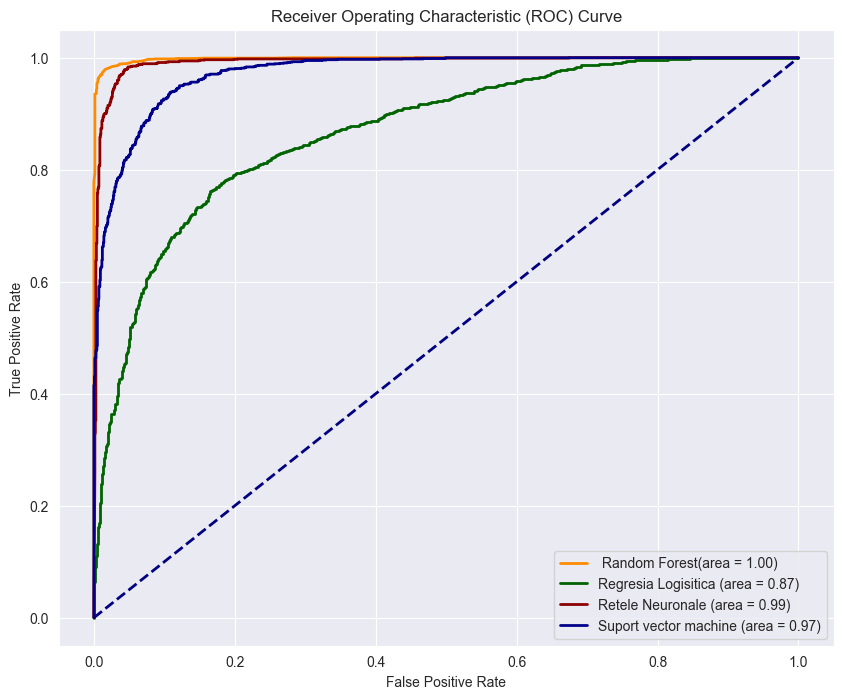

In [84]:
plt.figure(figsize=(10, 8))
plt.plot(fprRF, tprRF, color='darkorange', lw=2, label=f' Random Forest(area = {roc_aucRF:.2f})')
plt.plot(fprLog, tprLog, color='darkgreen', lw=2, label=f'Regresia Logisitica (area = {roc_aucLog:.2f})')
plt.plot(fprRN, tprRN, color='darkred', lw=2, label=f'Retele Neuronale (area = {roc_aucRN:.2f})')
plt.plot(fprSvm, tprSvm, color='darkblue', lw=2, label=f'Suport vector machine (area = {roc_aucSvm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

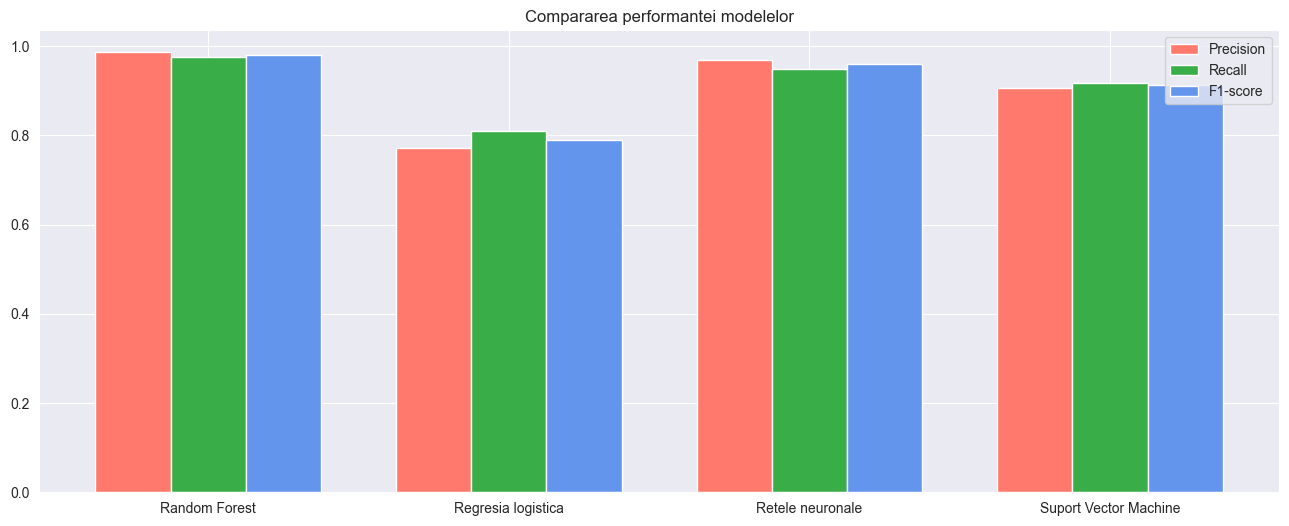

In [88]:
labels = ['Random Forest', 'Regresia logistica', 'Retele neuronale', 'Suport Vector Machine']
precision_scores = [precisionRF, precisionLog, precisionRN, precisionSVM]
recall_scores = [recallRF, recallLog, recallRN, recallSVM]
f1_scores = [f1RF, f1Log, f1RN, f1SVM]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(16, 6))
rects1 = ax.bar(x - width, precision_scores, width, label='Precision', color='#FF796C')
rects2 = ax.bar(x, recall_scores, width, label='Recall',  color='#39AD48')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-score',  color='#6495ED')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title('Compararea performantei modelelor')
plt.show()